## Self Organizing Maps##

#### Self-Organizing Maps (SOMs) are the most well known unsupervised neural network approach to clustering.

The architecture of the SOM is a feed-forward neural network with a single layer of neurons arranged into a rectangular array. When an input pattern is presented to the SOM, each neuron calculates how similar the input is to its weights. The neuron whose weights are most similar (minimal distance, d, in input space) is declared the winner of the competition for the input pattern, and the weights of the winning neuron are strengthened to reflect the outcome. The winning neuron receives the most learning at any stage; with neighbors receiving less, the further away they are from the winning neuron ####

#### Advantages of SOM
•Working with high dimensional data sets is difficult; the SOM reduces information while preserving the most important topological relationships of the data elements on the two-dimensional plane, so that information from different sources can be efficiently fused.

•SOMs are trained using unsupervised learning, i.e. no prior knowledge is available and no assumptions are made about the class membership of data.

•The SOM algorithm is very efficient in handling large datasets. The SOM algorithm is also robust even when the data set is noisy.


#### Disadvantages of SOM
•The number of clusters needs to be specified. Clustering is a two-phase process: determining the number of clusters and clustering the data. Determining the number of clusters is not trivial, since the characteristics of the data set are usually not known a priori. This can be overcome by running the algorithm with varying numbers of clusters and selecting the most appropriate clustering result according to a figure of merit.

•A user has to either do manual inspection or apply traditional algorithms, like hierarchical or partitive, to find the cluster boundaries.

In [20]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp37-none-any.whl size=8526 sha256=59a5f47573388b0558be7f722cb1497963756cf1b350e3451010be4656694278
  Stored in directory: /Users/flatironschool/Library/Caches/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


In [22]:
! pip install progressbar

  Created wheel for progressbar: filename=progressbar-2.5-cp37-none-any.whl size=12074 sha256=23c9aed43ea1a99850b174e31f58e5fc163aad2fd9639f33ee0a4ae82ad06aaa
  Stored in directory: /Users/flatironschool/Library/Caches/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built progressbar


#### Importing Libraries and Dataset

In [70]:
### importing libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from progressbar import ProgressBar

In [71]:
# importing dataset
data=pd.read_csv('creditcard.csv')

In [72]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [73]:
df=data.copy()#copying data into df 

In [14]:
df.drop('Class',axis=1,inplace=True)# dropping Class from dataset

In [15]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  
0  0.128539 -0.189115  0.133558 -0.021053  149.62  
1  0.167170  0.125895 -0.008983  0.014724    2.69  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66  
3  0.647376 -0.221929  0.062723  0.061458  123.50  
4 -0.206010  0.502292  0.219422  0.215153   69.99  

[5 rows x 30 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

#### Features Scaling

In [78]:
# Minmax scaling to convert all the values to between 0 & 1 
sc = MinMaxScaler()
X = sc.fit_transform(df)
num_columns = len(df.columns)

In [61]:
class_data = data['Class']

#### Building Model

In [46]:
#Building a 2-D matrix of 52x52 
som = MiniSom(52,52,num_columns,sigma=0.3, learning_rate=0.1)

#Assigning random initial weights
som.random_weights_init(X)



In [47]:
#Training the model with 500 iterations
som.train_random(X,500)

In [82]:
som.diff_graph()

AttributeError: 'MiniSom' object has no attribute 'diff_graph'

In [48]:
#Getting the winner node for each of the transaction and putting it in the list w
pbar = ProgressBar()
w=[]
for x in pbar(X):
    w.append(som.winner(x))

100% |########################################################################|


In [51]:
# Assigning the Euclidean distance of each transaction to the index number of that transaction
dist_map = som.distance_map()
cust = {}
for i in range(len(w)):
    cust[i] = dist_map[w[i]]
    
# Converting the cust dictionary to dataframe and joining it to users dataframe
cust = pd.DataFrame.from_dict(cust, orient='index', columns = ['Distance'])
class_data = class_data.to_frame().join(cust)

In [53]:
class_data[class_data['Distance']>0.7]

Class  Distance
8296        1  0.860007
8335        1  0.860007
8615        1  0.860007
9035        1  0.860007
9179        1  0.860007
...       ...       ...
154234      1  0.864458
154371      1  1.000000
154587      1  1.000000
154668      1  0.860007
154684      1  1.000000

[123 rows x 2 columns]

#### Model 2

In [56]:
#Building a 2-D matrix of 52x52 
som1 = MiniSom(52,52,num_columns,sigma=1, learning_rate=0.1,neighborhood_function='bubble')

#Assigning random initial weights
som1.random_weights_init(X)

In [57]:
#Training the model with 500 iterations
som1.train_random(X,500)

In [58]:
#Getting the winner node for each of the transaction and putting it in the list w
pbar = ProgressBar()
w=[]
for x in pbar(X):
    w.append(som1.winner(x))

100% |########################################################################|


In [62]:
# Assigning the Euclidean distance of each transaction to the index number of that transaction
dist_map1 = som1.distance_map()
cust1 = {}
for i in range(len(w)):
    cust1[i] = dist_map1[w[i]]
    
# Converting the cust dictionary to dataframe and joining it to users dataframe
cust1 = pd.DataFrame.from_dict(cust1, orient='index', columns = ['Distance'])
class_data1 = class_data.to_frame().join(cust1)

In [64]:
class_data1[class_data1['Distance']>0.8]

Class  Distance
73          0  0.856901
86          0  0.856901
121         0  0.856901
187         0  0.856901
256         0  0.856901
...       ...       ...
271477      0  0.812195
271773      0  0.812195
271810      0  0.812195
271853      0  0.812195
282740      0  0.812195

[314 rows x 2 columns]

In [66]:
!pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-cp37-none-any.whl size=17087 sha256=b51b68dc43e79023546e2112516afff38f017392e0c43c3afe4e7dbdaee8f864
  Stored in directory: /Users/flatironschool/Library/Caches/pip/wheels/51/76/ee/c02f0bc20af4cd8f46ee4142ebf7bb654b737d6d8f2360d26b
Successfully built SimpSOM


In [75]:
import SimpSOM as sps 
from sklearn.cluster import KMeans

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


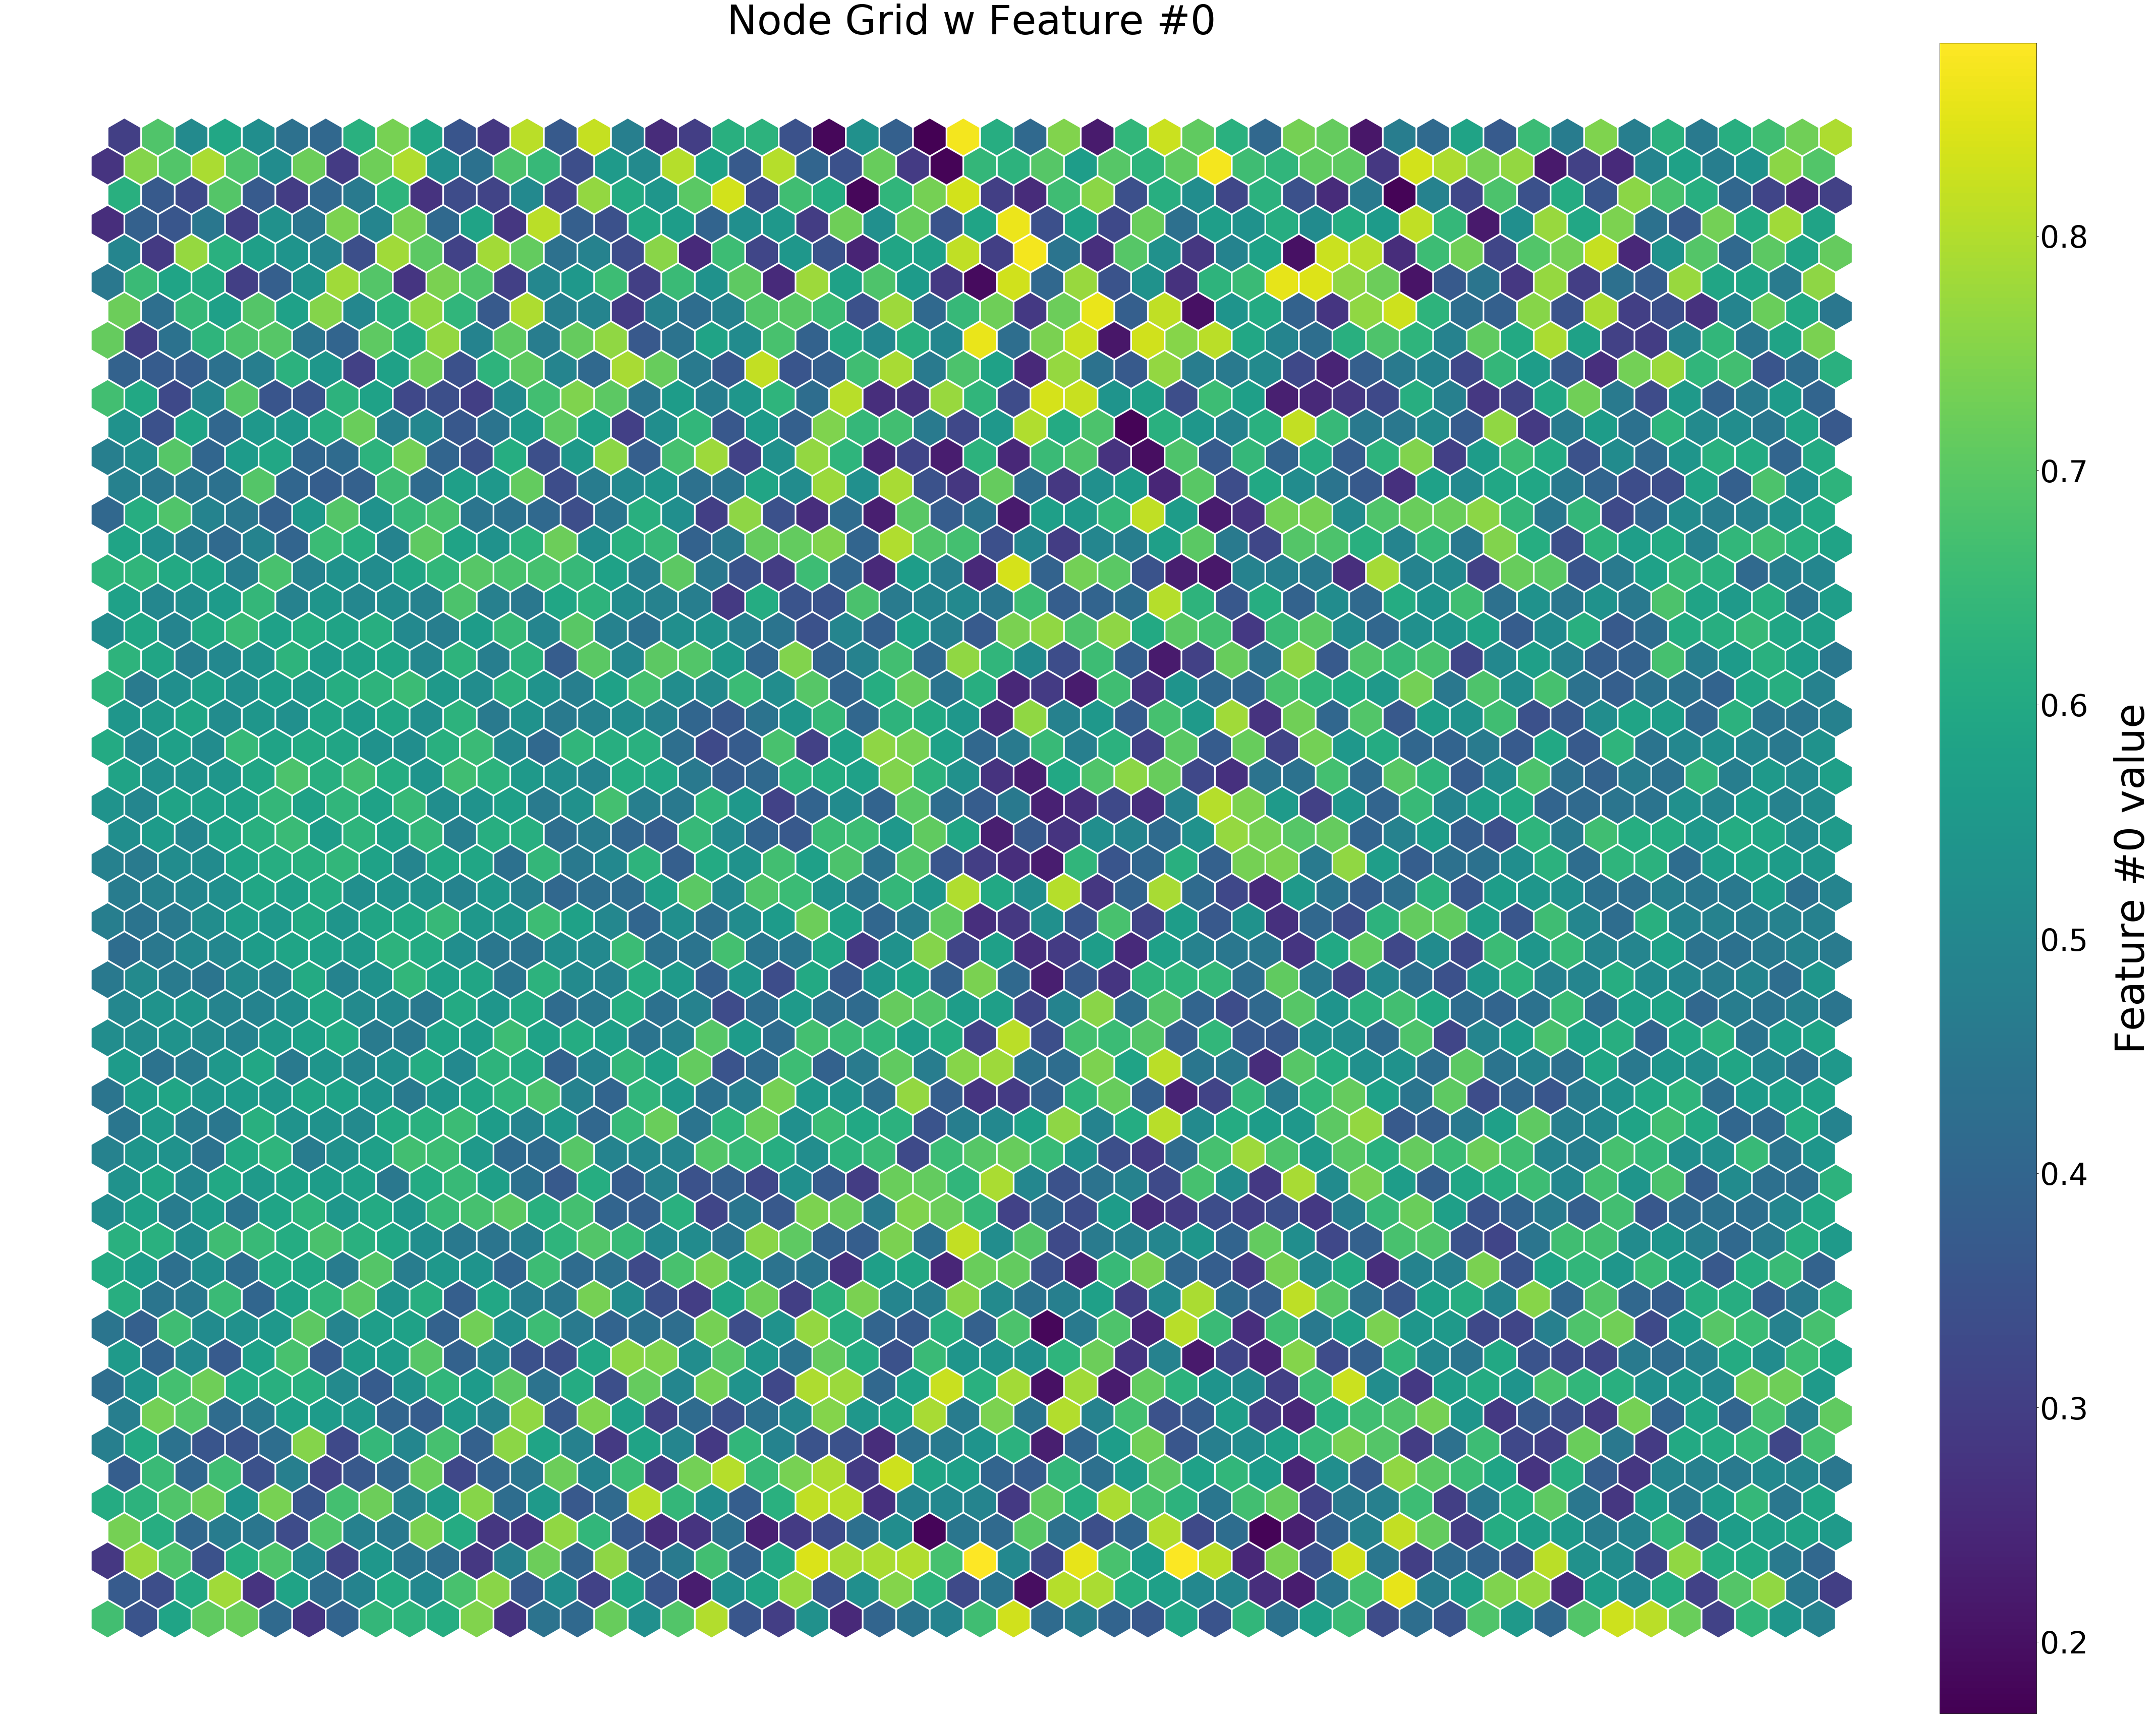

In [76]:
net = sps.somNet(52, 52, X, PBC=True)
net.train(0.01, 500) 
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)

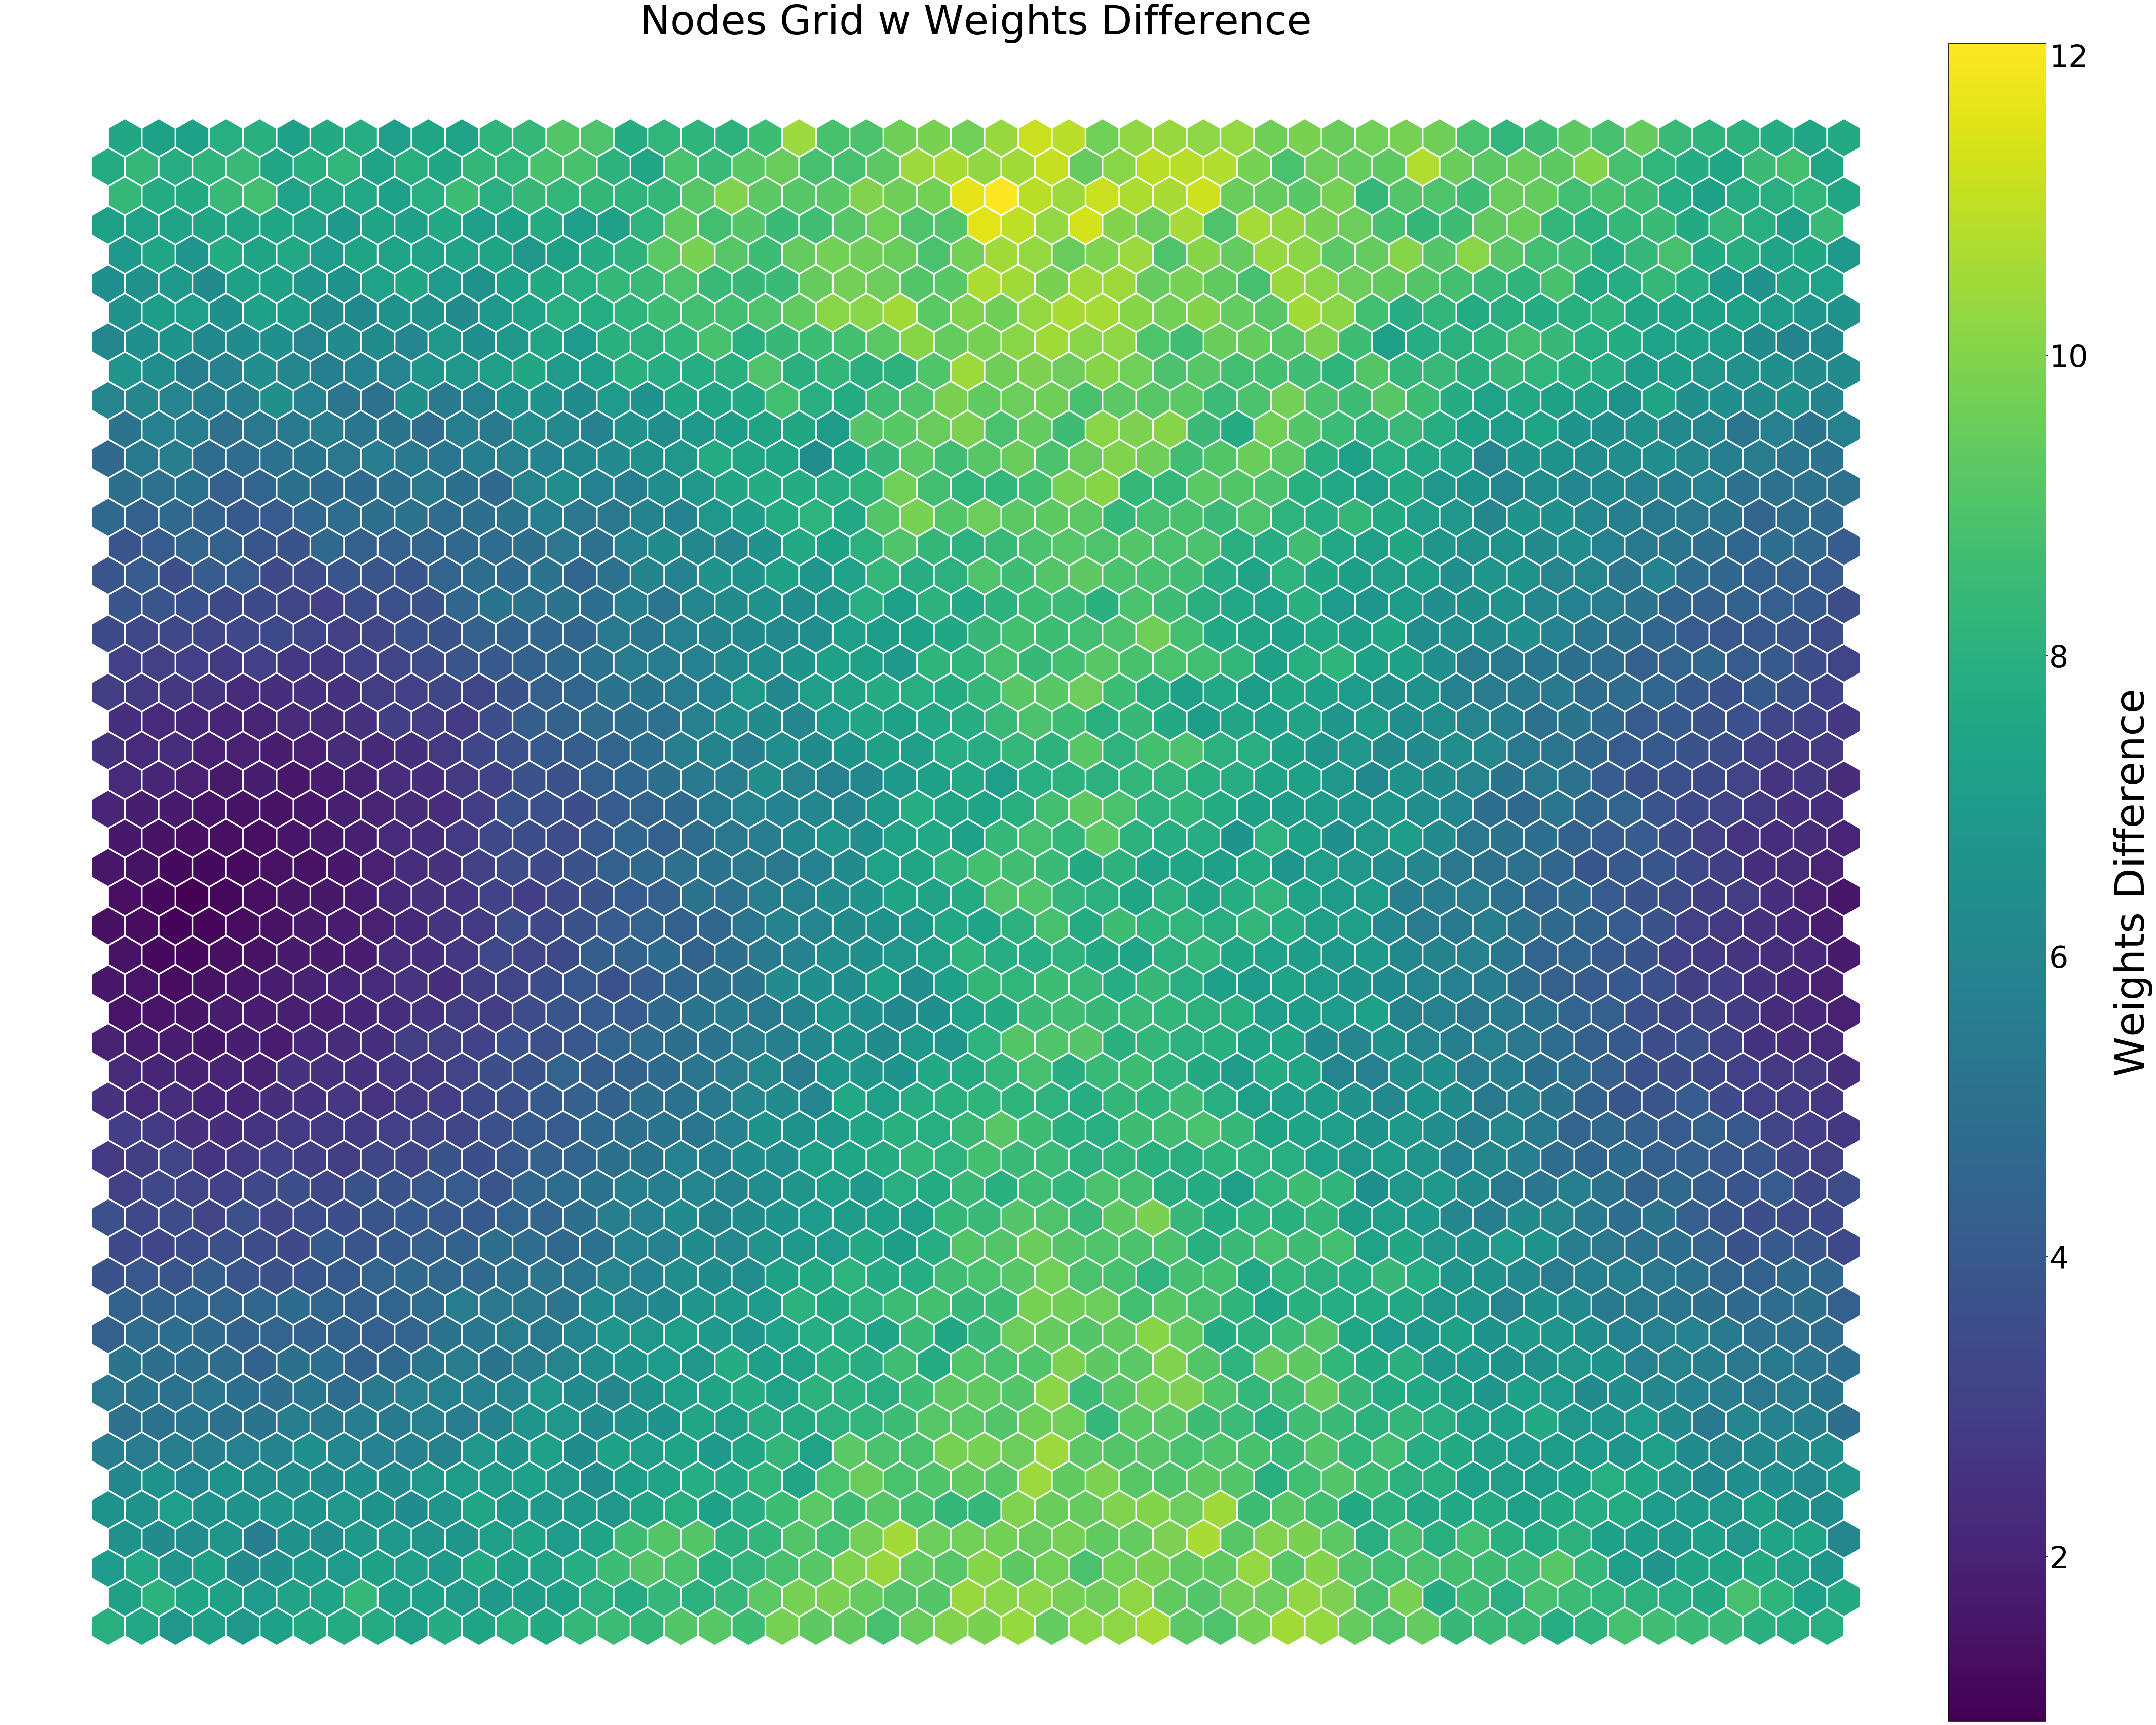

In [77]:
net.diff_graph()